# Task 5: Exploratory Data Analysis (EDA) on the Titanic Dataset

**Tools:** Python, Pandas, Matplotlib, Seaborn  
**Files:** `train.csv`, `gender_submission.csv`

In [7]:
#1.Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"]=(10,6)

In [4]:
#2. Load The Data
train = pd.read_csv("train.csv")
gender_sub = pd.read_csv("gender_submission.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#3.Basic Structure & Summary

train.info()

train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#4.Missing Value Analysis

missing = train.isnull().sum().sort_values(ascending=False)
pct_missing = (missing / train.shape[0]*100).round(2)
pd.concat([missing,pct_missing.rename("pct")],axis=1,keys=("missing","pct"))

,missing,pct
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


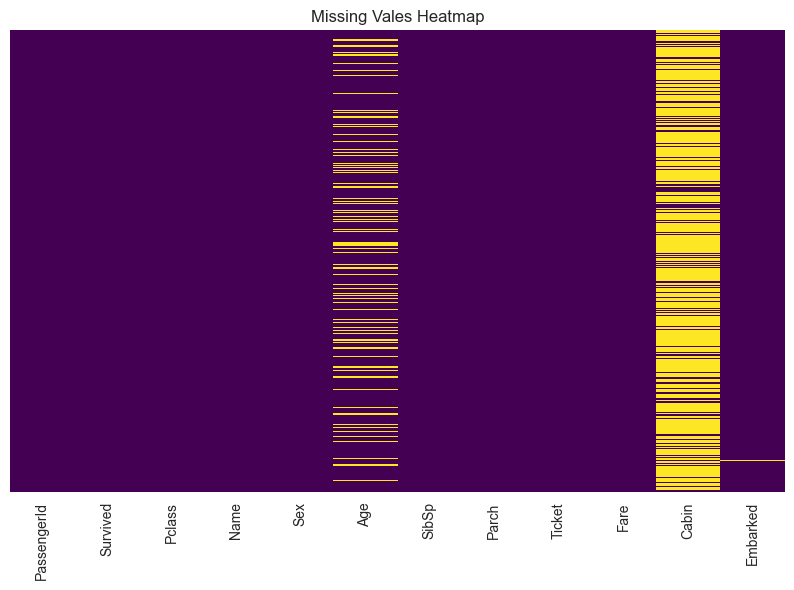

In [11]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap="viridis")
plt.title("Missing Vales Heatmap")
plt.show()

C:\Users\sonik\AppData\Local\Temp\ipykernel_6244\320247204.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=train, palette="Blues", ax=axes[0,1])
C:\Users\sonik\AppData\Local\Temp\ipykernel_6244\320247204.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=train, palette="Set2", ax=axes[1,0])
C:\Users\sonik\AppData\Local\Temp\ipykernel_6244\320247204.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Embarked", data=train, palette="Set1", ax=axes[1,1])


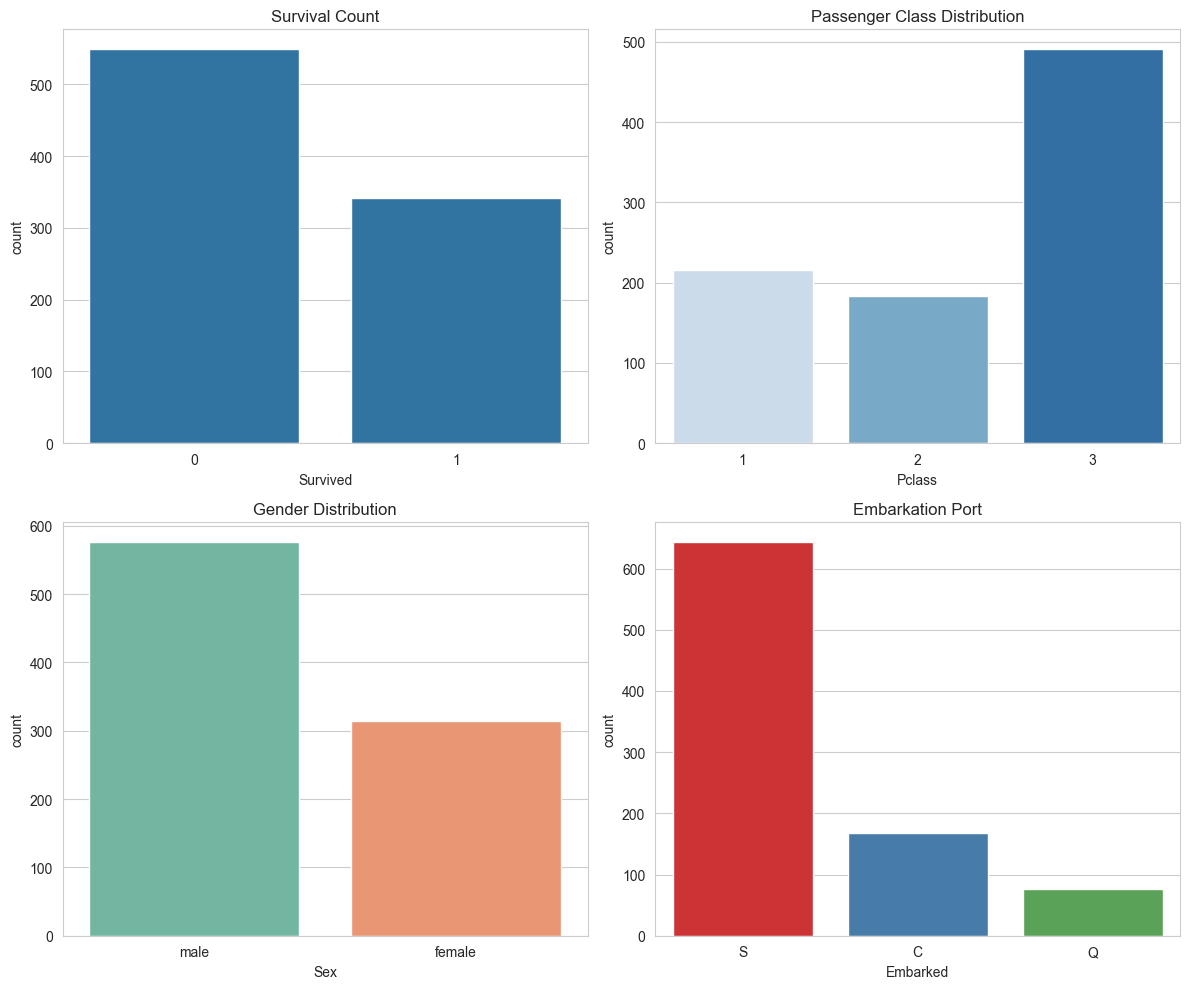

In [13]:
#5. Univariate Analysis

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x="Survived", data=train, ax=axes[0,0])
axes[0,0].set_title("Survival Count")

sns.countplot(x="Pclass", data=train, palette="Blues", ax=axes[0,1])
axes[0,1].set_title("Passenger Class Distribution")

sns.countplot(x="Sex", data=train, palette="Set2", ax=axes[1,0])
axes[1,0].set_title("Gender Distribution")

sns.countplot(x="Embarked", data=train, palette="Set1", ax=axes[1,1])
axes[1,1].set_title("Embarkation Port")

plt.tight_layout()
plt.show()


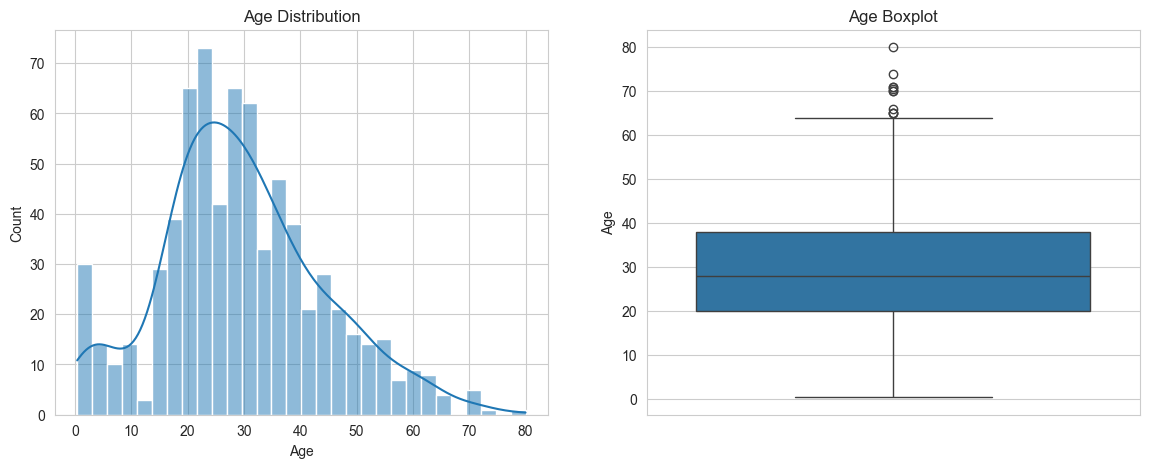

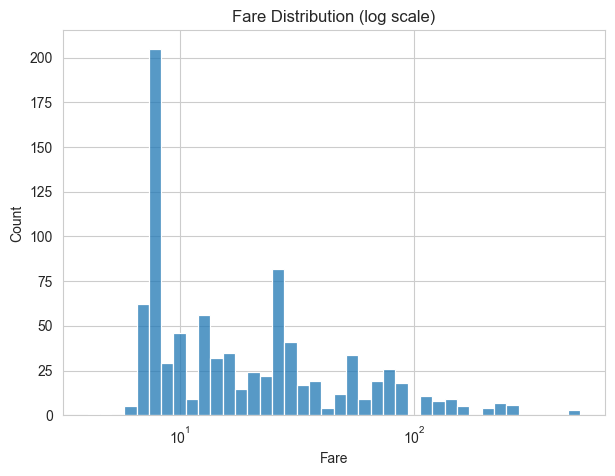

In [14]:

# Age histogram & boxplot
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(train["Age"].dropna(), bins=30, kde=True, ax=ax[0])
ax[0].set_title("Age Distribution")

sns.boxplot(y=train["Age"], ax=ax[1])
ax[1].set_title("Age Boxplot")
plt.show()

# Fare histogram (log scale)
plt.figure(figsize=(7,5))
sns.histplot(train["Fare"], bins=40, log_scale=True)
plt.title("Fare Distribution (log scale)")
plt.show()


C:\Users\sonik\AppData\Local\Temp\ipykernel_6244\2553200225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=train, palette="Set2", ax=axes[1])
C:\Users\sonik\AppData\Local\Temp\ipykernel_6244\2553200225.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=train, palette="Set1", ax=axes[2])


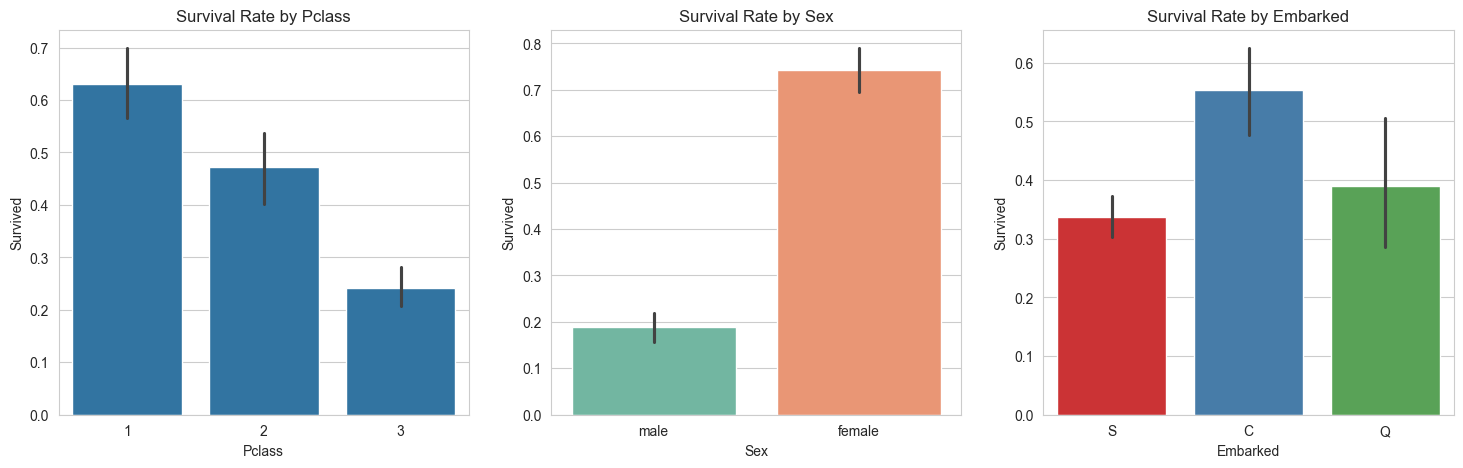

In [15]:
# 6. BIVARIATE ANALYSIS


fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.barplot(x="Pclass", y="Survived", data=train, ax=axes[0])
axes[0].set_title("Survival Rate by Pclass")

sns.barplot(x="Sex", y="Survived", data=train, palette="Set2", ax=axes[1])
axes[1].set_title("Survival Rate by Sex")

sns.barplot(x="Embarked", y="Survived", data=train, palette="Set1", ax=axes[2])
axes[2].set_title("Survival Rate by Embarked")
plt.show()


C:\Users\sonik\AppData\Local\Temp\ipykernel_6244\675692646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y="Age", data=train, palette="Pastel1", ax=ax[0])
C:\Users\sonik\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


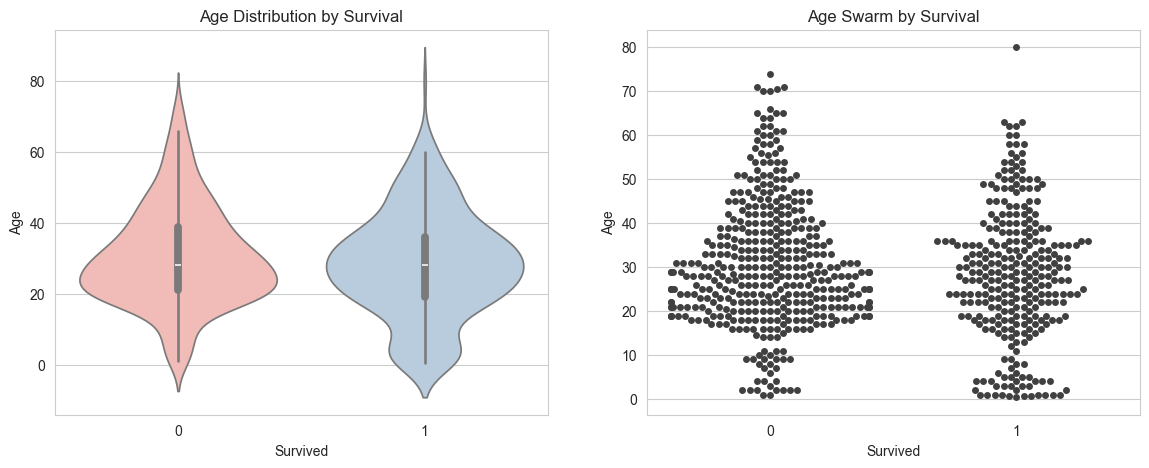

In [16]:

fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.violinplot(x="Survived", y="Age", data=train, palette="Pastel1", ax=ax[0])
ax[0].set_title("Age Distribution by Survival")

sns.swarmplot(x="Survived", y="Age", data=train, color=".25", ax=ax[1])
ax[1].set_title("Age Swarm by Survival")
plt.show()


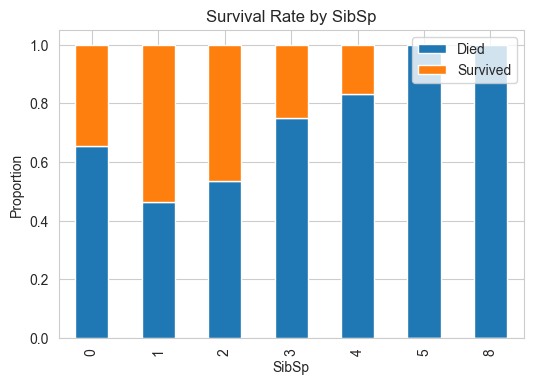

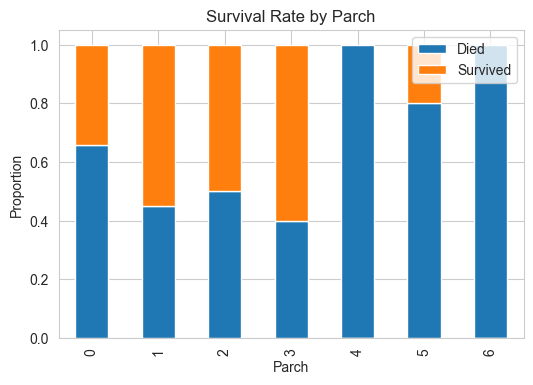

In [17]:

for col in ["SibSp", "Parch"]:
    ct = pd.crosstab(train[col], train["Survived"], normalize="index")
    ct.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title(f"Survival Rate by {col}")
    plt.ylabel("Proportion")
    plt.legend(["Died","Survived"])
    plt.show()


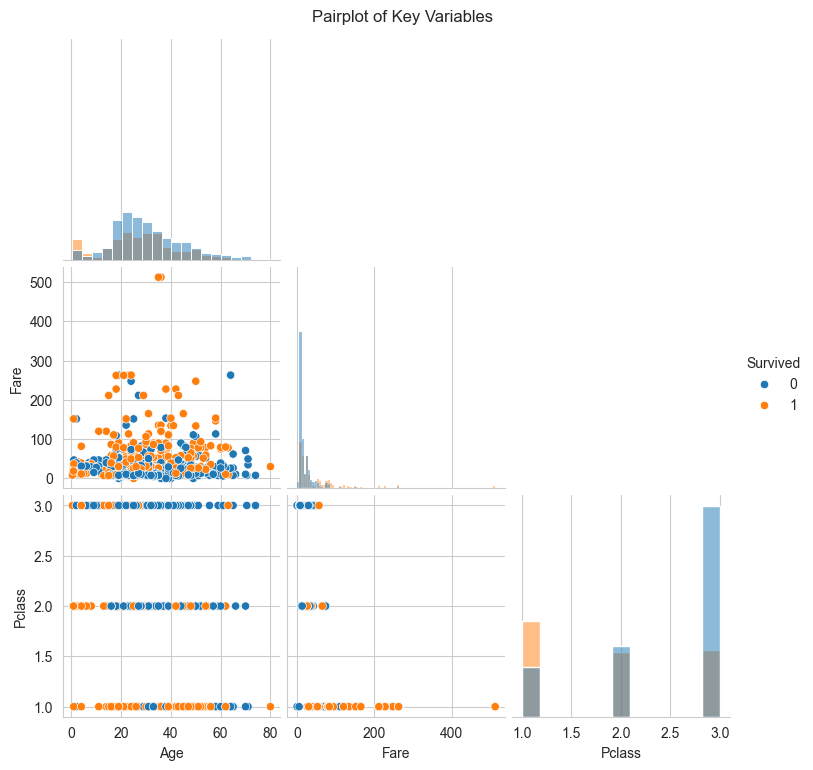

In [18]:
# 7. MULTIVARIATE ANALYSIS

sns.pairplot(train[["Age","Fare","Pclass","Survived"]].dropna(),
             hue="Survived", diag_kind="hist", corner=True)
plt.suptitle("Pairplot of Key Variables", y=1.02)
plt.show()


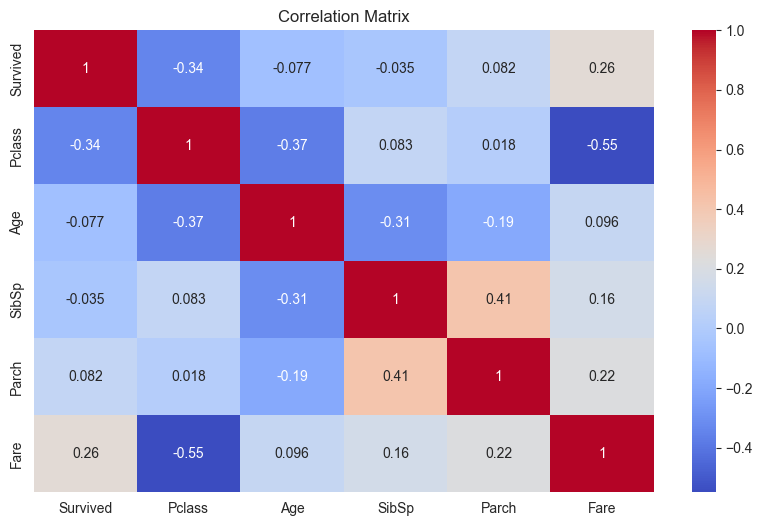

In [19]:

corr = train[["Survived","Pclass","Age","SibSp","Parch","Fare"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


C:\Users\sonik\AppData\Local\Temp\ipykernel_6244\712644818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=train, palette="viridis")


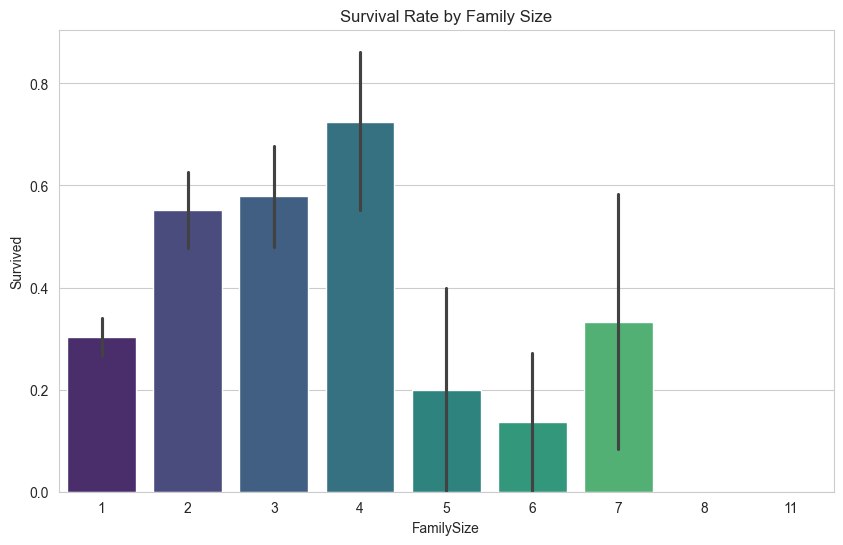

C:\Users\sonik\AppData\Local\Temp\ipykernel_6244\712644818.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Title", y="Survived", data=train, palette="Pastel2")


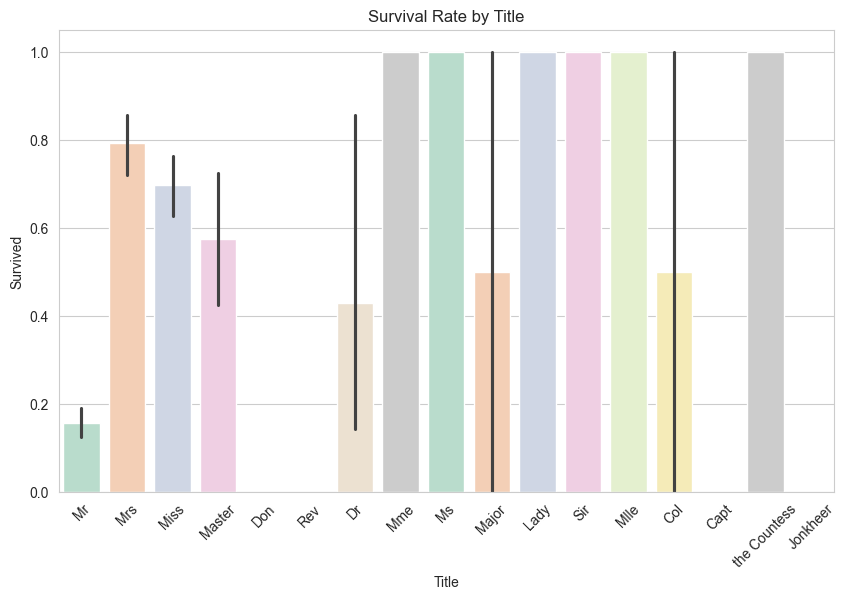

In [20]:
# 8. FEATURE ENGINEERING EXAMPLES (optional)

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
sns.barplot(x="FamilySize", y="Survived", data=train, palette="viridis")
plt.title("Survival Rate by Family Size")
plt.show()

# 8.2 Title extraction from Name
train["Title"] = train["Name"].str.extract(r",\s*([^\.]+)\.")
sns.barplot(x="Title", y="Survived", data=train, palette="Pastel2")
plt.xticks(rotation=45)
plt.title("Survival Rate by Title")
plt.show()
